# Module: NumPy

Wessel Rijk & Tjip Bischoff, April 2020 

*Abstract* <br>
Short Jupyter notebook that introduces the NumPy Package. We will start with a short introduction of how it came to be and continue by showing it's advantages, disadvantages and its use. We will then show a short speed comparison between NumPy and regular Python lists and discuss it's further speed advantages and how they compare to regular Python and C. We will finish with a conclusion.

# Intro

**Python :**
Created by Guido van Rossum and first released in 1991.
Not meant for computational use

*In 1995 :* Array computing using the well known index notation [i] was introduced. It worked, but it was slow.
To solve this, Numeric and Numarray were developed. Numeric was faster for smaller arrays, Numarray faster for larger arrays.

*In 2005 :* To solve this, Numarray was ported to Numeric by Travis Oliphant (who is also the founder of Anaconda). This combination was called NumPy

**NumPy :**
So what is NumPy? From there own site:

***What is NumPy?***

*NumPy is the fundamental package for scientific computing in Python. It is a Python library that provides a multidimensional array object, various derived objects (such as masked arrays and matrices), and an assortment of routines for fast operations on arrays, including mathematical, logical, shape manipulation, sorting, selecting, I/O, discrete Fourier transforms, basic linear algebra, basic statistical operations, random simulation and much more.*


  

## Why and when to recommend Numpy?

* When you have large data: <br>
As we will show, it takes a long time to iterate over very long lists in Python. When using Numpy arrays, iteration can be done up to 100x faster! This is great for scientific computing, as for instance particle detector data can be extremely large and take a considerably long time to process.

* Structurised N-dimensional arrays:<br>
Numpy arrays are structured in a very organised way. It has an intrinsic 'shape' tuple which describes the sizes of each of its dimensions and 'dtype' which describes the data type of its elements. Both are utilised to form the N-dimensional Numpy array.

* It is intuitive:<br>
Unlike normal lists in Python, mathematical operations can be done in a very simple way. like the addition of two Numpy arrays is done simply by: array_a + array_b.
Additionaly, Numpy arrays are easily changed in size.

* It supports quick integration from data files:<br>
Loading in a data file that contains Ndimensional array and converting this straight to a Numpy array. Additionally, saving Numpy arrays to data files so they can be used in the future. Numpy also has functions to load text files for which a delimiter needs to be selected in the case that the columns of the textfile are not seperated by a whitespace.

* The package boasts numerous routine functions: linear algebra, fourier transform and random number generation:<br>
Functions such as these can be found in other python packages, but are also integrated in the Numpy package. Functions such as the linear algebra and fourier transform can be apllied straight to a Numpy array, making them easy to use. 
N.B. the scipy package version of linear algebra contains some extra functions, however they still rely on the use of Numpy arrays.

* Numpy arrays are used for numerous mathematical/scientific Python packages:<br>
These functions do support standard Python input, but will convert them to Numpy arrays either way. Therefore, using these functions in your project in conjunction with Numpy arrays is recommended. Additionaly, in order to understand most of these functions, a basic understanding of Numpy arrays is required.

* Integrating C++ or Fortran code: <br>
The Numpy package claims it contains useful tools to integrate C/C++ and Fortran code. For this, one can use the Numpy libraries f2py for Fortran and Cython or Ctype for C.

##### Not recommended when:
* Working with small lists/datasets: <br>
When working in Python with small lists, creating a Numpy array requires more resources than a simple Python list would.

* Using many different datatypes:<br>
One Numpy array can only hold elements of the same data type. 
Use TTree Root for example, to store data of many different datatypes.

* When appending numerous times or appending lists together. <br>
Whenever something needs to be appended to a Numpy array, or whenever two numpy arrays are appended to each other, a whole new Numpy array needs to be created. This is not the case for Python lists, since these contain pointers stored throughout the memory, appending is done simply by having the pointer of the element at the end of the list point to the 'to be appended' element or list.



## Intuitive

In [1]:
import time
import numpy as np
from matplotlib import pyplot as plt

In [2]:
a = np.arange(5)
b = np.ones(5)
print('Adding lists is easy in Numpy:\na =',a,', b =',b,'\na + b =',a+b)
print('\nSo is multiplication:\n2 * b =',2*b,'\na * (2*b) =', a*(2*b))
print('\nAnd other operations:\na**2 =', a**2, '\t(int)\na**2. =', a**2.,'\t(float)')
print('\nAlso, type is converted automatically:\ntype of  a = ',
      a.dtype,', type of b = ',b.dtype, '\ntype of a + b = ', (a+b).dtype)

Adding lists is easy in Numpy:
a = [0 1 2 3 4] , b = [1. 1. 1. 1. 1.] 
a + b = [1. 2. 3. 4. 5.]

So is multiplication:
2 * b = [2. 2. 2. 2. 2.] 
a * (2*b) = [0. 2. 4. 6. 8.]

And other operations:
a**2 = [ 0  1  4  9 16] 	(int)
a**2. = [ 0.  1.  4.  9. 16.] 	(float)

Also, type is converted automatically:
type of  a =  int32 , type of b =  float64 
type of a + b =  float64


In [3]:
a = [i for i in range(5)]
b = [1. for i in range(5)]
print('This is not so easy with Python lists:\na + b =',a+b, ' which appends one list to the other.')
print('\nNeither is multiplication:\na * 2 =',a*2, ' which appends one list to itself.'
      +'\na * b is not possible!')
print('\nFix with list comprehension:\n[a[i] + b[i] for i in range(5)] = ', [a[i] + b[i] for i in range(5)])
print('[a[i] * (2*b[i]) for i in range(5)] =',[a[i] * (2*b[i]) for i in range(5)])

This is not so easy with Python lists:
a + b = [0, 1, 2, 3, 4, 1.0, 1.0, 1.0, 1.0, 1.0]  which appends one list to the other.

Neither is multiplication:
a * 2 = [0, 1, 2, 3, 4, 0, 1, 2, 3, 4]  which appends one list to itself.
a * b is not possible!

Fix with list comprehension:
[a[i] + b[i] for i in range(5)] =  [1.0, 2.0, 3.0, 4.0, 5.0]
[a[i] * (2*b[i]) for i in range(5)] = [0.0, 2.0, 4.0, 6.0, 8.0]


In [4]:
# Reshaping a numpy array
c = np.random.randint(0, 10, 10)
print('A Numpy array like: c = ',c)
c.resize(5,2)
print('Can be easily resized with c.resize(5,2), like:\n', c)
print('And c.reshape(2,5) creates a new object:\n', c.reshape(2,5))
print('Because c will remain the same:\n', c)

A Numpy array like: c =  [4 9 9 2 6 3 5 3 5 8]
Can be easily resized with c.resize(5,2), like:
 [[4 9]
 [9 2]
 [6 3]
 [5 3]
 [5 8]]
And c.reshape(2,5) creates a new object:
 [[4 9 9 2 6]
 [3 5 3 5 8]]
Because c will remain the same:
 [[4 9]
 [9 2]
 [6 3]
 [5 3]
 [5 8]]


Other numpy functions to manipulate the arrays:<br>
numpy.vstack<br>
numpy.split

## Save and Load data files

In [5]:
# Easily save data files:

# Create random numpy array and save it
rand = np.random.randint(0,10,(200,100))
print("Input:\n",rand, '\nThe shape of the random Numpy array is ', rand.shape)
np.save('test', rand)


Input:
 [[1 7 6 ... 4 8 1]
 [1 9 6 ... 9 8 0]
 [6 6 5 ... 0 5 0]
 ...
 [9 2 7 ... 4 5 2]
 [7 3 9 ... 3 4 0]
 [3 9 3 ... 5 9 0]] 
The shape of the random Numpy array is  (200, 100)


In [6]:
# Easily load data files:

# Load the random numpy array
loaded = np.load('test.npy')
print('Loaded:\n',loaded, '\nThe shape of the random Numpy array is ', loaded.shape)

Loaded:
 [[1 7 6 ... 4 8 1]
 [1 9 6 ... 9 8 0]
 [6 6 5 ... 0 5 0]
 ...
 [9 2 7 ... 4 5 2]
 [7 3 9 ... 3 4 0]
 [3 9 3 ... 5 9 0]] 
The shape of the random Numpy array is  (200, 100)


In [7]:
# Or even txt files

from io import StringIO   # StringIO behaves like a file object (taken from numpy.loadtxt reference page)
c = StringIO(u"0;1;4\n2;3;6\n5;7;8")
test = np.loadtxt(c, delimiter=';')
print('Input:',u"\n0;1;4\n2;3;6\n5;7;8",'\n\nLoaded:\n', test, '\nWith type = ',test.dtype)

Input: 
0;1;4
2;3;6
5;7;8 

Loaded:
 [[0. 1. 4.]
 [2. 3. 6.]
 [5. 7. 8.]] 
With type =  float64


## Routine Functions

In [8]:
# Linalg, also (more prominently) featured in SciPy

a = np.arange(5)
b = np.ones(5) * 2
print('Taking the two numpy arrays:\na =',a,', b =',b,
      '\nAnd using numpy.dot(a, b) to find the dot product: ',np.dot(a,b))
print('\nOr the outer product:\n', np.outer(a,b))

Taking the two numpy arrays:
a = [0 1 2 3 4] , b = [2. 2. 2. 2. 2.] 
And using numpy.dot(a, b) to find the dot product:  20.0

Or the outer product:
 [[0. 0. 0. 0. 0.]
 [2. 2. 2. 2. 2.]
 [4. 4. 4. 4. 4.]
 [6. 6. 6. 6. 6.]
 [8. 8. 8. 8. 8.]]


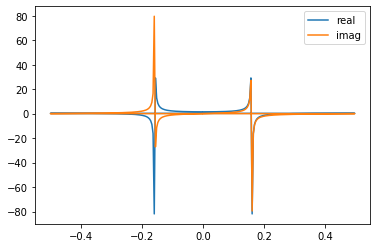

In [9]:
# Fast fourier transform (taken from numpy.fft.fft reference page)

t = np.arange(256)
sp = np.fft.fft(np.sin(t))
freq = np.fft.fftfreq(t.shape[-1])
plt.plot(freq, sp.real, label='real')
plt.plot(freq, sp.imag, label='imag')
plt.legend()
plt.show()

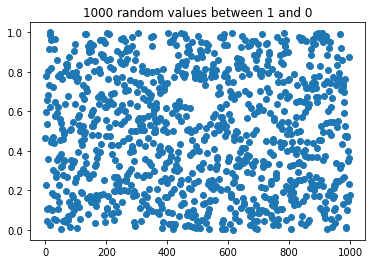

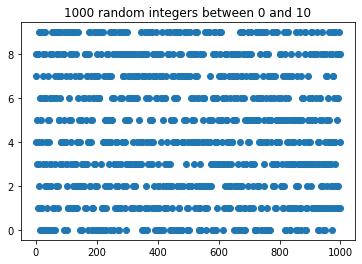

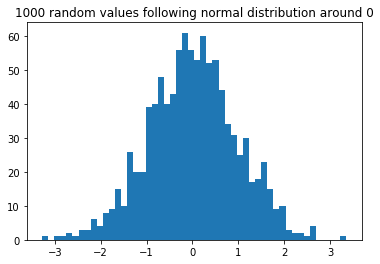


A 10x10 Numpy array created with integers between 0 and 10:
 [[5 0 5 9 8 9 3 7 5 1]
 [4 3 4 1 9 0 6 6 7 9]
 [0 8 7 2 2 1 5 7 4 4]
 [2 0 8 7 4 6 9 8 8 3]
 [0 4 7 0 4 2 6 9 6 0]
 [1 9 2 4 6 0 8 2 6 5]
 [9 9 8 8 7 7 6 3 9 2]
 [0 0 7 6 7 8 6 9 3 5]
 [5 2 7 1 2 7 4 6 1 8]
 [4 5 5 1 0 6 6 3 8 9]]


In [10]:
# Random number generation

plt.title("1000 random values between 1 and 0")
plt.plot(np.random.rand(1000), 'o')
plt.show()
plt.title("1000 random integers between 0 and 10")
plt.plot(np.random.randint(0,10, 1000), 'o')
plt.show()
plt.title("1000 random values following normal distribution around 0")
plt.hist(np.random.randn(1000), bins=50)
plt.show()

print('\nA 10x10 Numpy array created with integers between 0 and 10:\n',np.random.randint(0,10,(10,10)))

## Python Packages Using Numpy

The number of scientific and mathematical Python packages that uses Numpy is still growing. Even if these packages might work with standard Python input, they convert this to Numpy arrays. Some noteable packages that uses Numpy are Scipy, NumBa, escript and scikit-learn.

# Integrate C++ or Fortran

f2py, Cython and Ctype are modules available that link Python to C code. f2py is part of numpy and can be imported straight away to link Python to Fortran. Cython and Ctype are used to link python to C. Running scripts in Python can be a lot slower than running it in a programming language like Fortran or C. Except for f2py, these modules don't seem to be exclusive for Numpy. However, integrating with Numpy arrays might be very powerful.

For more info: https://docs.scipy.org/doc/numpy/user/c-info.python-as-glue.html

An example to show how Cython works in Jupyter, taken from: https://cython.readthedocs.io/en/latest/src/quickstart/build.html :

To enable support for Cython compilation, install Cython as described in the installation guide and load the Cython extension from within the Jupyter notebook:

In [11]:
%load_ext Cython

Then, prefix a cell with the %%cython marker to compile it. You can show Cython’s code analysis by passing the --annotate option:

In [12]:
%%cython --annotate

cdef int a = 0
for i in range(10):
    a += i
print(a)

45


# Why is NumPy faster?

**Why is NumPy faster?**

Numpy lists two reasons on it's own site: <br>
-Vectorisation <br>
-Broadcasting <br>

-There is, however, a third reason which has to do with the data storage.

**Vectorisation**

*"Vectorization describes the absence of any explicit looping, indexing, etc., in the code - these things are taking place, of course, just “behind the scenes” in optimized, pre-compiled C code."*

**Broadcasting**

Broadcasting is the execution of implicit element by element operations. So where a + b means adding each element of a to it's counterpart in b. All sites mention this as being faster, but when we tried to find out why, we only found that this is because it's uses faster linear algebra methods.


**Data Storage**

In Python, a list is just a list of pointers. So every element points to a memory location. In NumPy, the list is stored similar to how lists are stored in c. All the elements need to be of the same type, so they are the same distance in bytes away from each other. A NumPy array is therefore just a pointer to the first element, and after that you just have to step x bytes to get to the next item.  
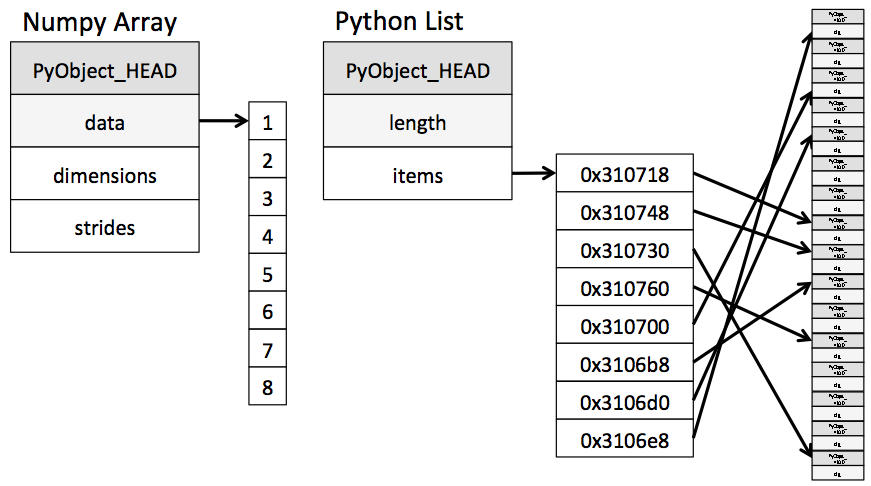

**Python lists vs NumPy Arrays speed comparison**

In [13]:
def pure_python_version(size_of_vec):
    t1 = time.time()
    X = range(size_of_vec)
    Y = range(size_of_vec)
    Z = [X[i] + Y[i] for i in range(len(X)) ]
    return time.time() - t1

In [14]:
def numpy_version(size_of_vec):
    t1 = time.time()
    
    X = np.arange(size_of_vec)
    Y = np.arange(size_of_vec)
    Z = X + Y
    return time.time() - t1

In [15]:
size_of_vec = 1000000
L_p = []
L_np = []
L_ratio = []
L_x_ratio = []

In [16]:
t1 = pure_python_version(size_of_vec)
t2 = numpy_version(size_of_vec)
print(t1, t2)
print("Numpy is in this example " + str(t1/t2) + " faster!")

0.3420884609222412 0.005002737045288086
Numpy is in this example 68.38026021064671 faster!


**Looking at low values**

In [17]:
T_List = np.linspace(100, 100000, 100, dtype=int)
print (T_List)
for i in T_List:
    P = pure_python_version(i)
    L_p.append(P)
    NP = numpy_version(i)
    L_np.append(NP)
    if (NP > 0):
        L_ratio.append(P/NP)
        L_x_ratio.append(i)
L_x = T_List


[   100   1109   2118   3127   4136   5145   6154   7163   8172   9181
  10190  11200  12209  13218  14227  15236  16245  17254  18263  19272
  20281  21290  22300  23309  24318  25327  26336  27345  28354  29363
  30372  31381  32390  33400  34409  35418  36427  37436  38445  39454
  40463  41472  42481  43490  44500  45509  46518  47527  48536  49545
  50554  51563  52572  53581  54590  55600  56609  57618  58627  59636
  60645  61654  62663  63672  64681  65690  66700  67709  68718  69727
  70736  71745  72754  73763  74772  75781  76790  77800  78809  79818
  80827  81836  82845  83854  84863  85872  86881  87890  88900  89909
  90918  91927  92936  93945  94954  95963  96972  97981  98990 100000]


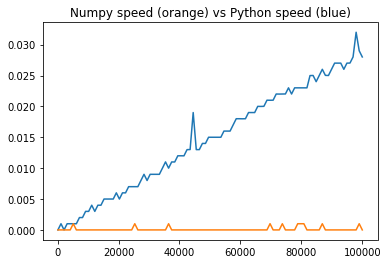

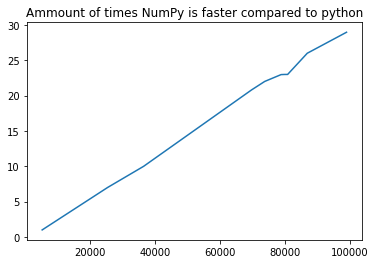

In [18]:
plt.plot(L_x, L_p)
plt.plot(L_x, L_np)
plt.title("Numpy speed (orange) vs Python speed (blue)")
plt.show()
plt.plot(L_x_ratio, L_ratio)
plt.title("Ammount of times NumPy is faster compared to python")
plt.show()

**Looking at higher values**

In [19]:
T_List = np.linspace(100000, 1000000, 10, dtype=int)
for i in T_List:
    P = pure_python_version(i)
    L_p.append(P)
    NP = numpy_version(i)
    L_np.append(NP)
    if (NP > 0):
        L_ratio.append(P/NP)
        L_x_ratio.append(i)
L_x = np.concatenate((L_x, T_List), axis=None)


In [20]:
T_List = np.linspace(1000000, 10000000, 10, dtype=int)
for i in T_List:
    P = pure_python_version(i)
    L_p.append(P)
    NP = numpy_version(i)
    L_np.append(NP)
    if (NP > 0):
        L_ratio.append(P/NP)
        L_x_ratio.append(i)
L_x = np.concatenate((L_x, T_List), axis=None)


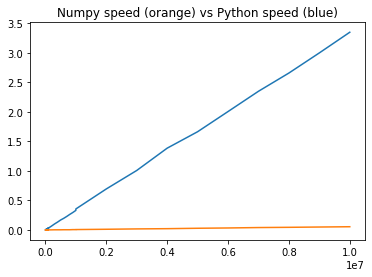

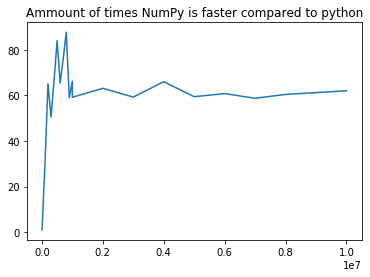

In [21]:
plt.plot(L_x, L_p)
plt.plot(L_x, L_np)
plt.title("Numpy speed (orange) vs Python speed (blue)")
plt.show()
plt.plot(L_x_ratio, L_ratio)
plt.title("Ammount of times NumPy is faster compared to python")
plt.show()

**Other examples** <br>
Examples taken from: https://towardsdatascience.com/how-fast-numpy-really-is-e9111df44347

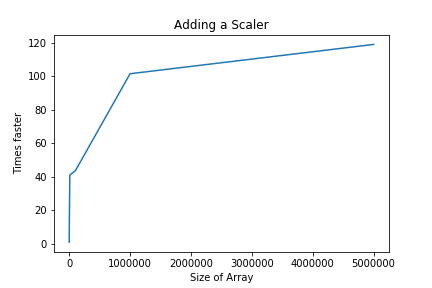

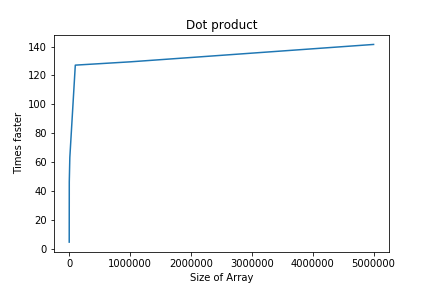

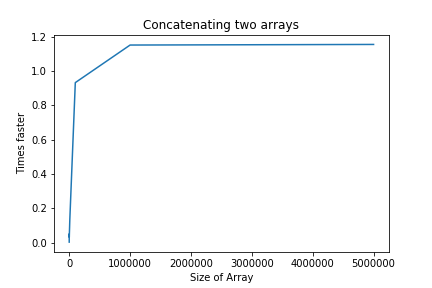

**Comparison between Numpy and C** <br>
Values taken from https://stackoverflow.com/questions/41365723/why-my-python-numpy-code-is-faster-than-c

**For k_max = 100000, N = 10000 results where following:** <br>
python 70.284362 s <br>
c++ 69.133199 s <br>
c 61.638186 s <br>
Python and c++ have basically the same time, but note that there is a python loop of length k_max, which should be much slower compared to c/c++ one. And it is.

**For k_max = 1000000, N = 1000 we have:** <br>
python 115.42766 s <br>
c++ 70.781380 s <br>

**For k_max = 1000000, N = 100: <br>**
python 52.86826 s <br>
c++ 7.050597 s <br>

**k_max = 100, N = 100000:**<br>
python 0.651587 s <br>
c++ 0.568518 s <br>

# Conclusion

As NumPy states themselve: *NumPy is the fundamental package for scientific computing in Python.* <br>
- NumPy is essential for computational use of python
- Can get close to speeds obtained by c
- Disadvantages: Only one kind of object in an array and adding items is inefficient.